In [2]:
clinTrial <- read.csv("ANOVAex_Tidy.csv")
#clinTrial

In [3]:
install.packages("plyr")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependency ‘Rcpp’




In [4]:
library(plyr)
library(ggplot2)
options(repr.plot.width = 7, repr.plot.height = 5)

In [8]:
plotData <- ddply(clinTrial, c("Treatment"), summarise,
                  n = length(BDIscore),
                  Mean = mean(BDIscore),
                  df = n - 1,
                  alpha = 0.05,
                  t_crit = qt(alpha/2, df = df, lower.tail = FALSE),
                  se = sd(BDIscore) / sqrt(n),
                  MOE = se * t_crit,
                  CI_bottom = Mean - MOE,
                  CI_top = Mean + MOE
)

plotData

Treatment,n,Mean,df,alpha,t_crit,se,MOE,CI_bottom,CI_top
<chr>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
ADM,5,16.2,4,0.05,2.776445,4.747631,13.181537,3.018463,29.38154
CT,5,22.8,4,0.05,2.776445,2.130728,5.915848,16.884152,28.71585
PLA,5,30.0,4,0.05,2.776445,3.146427,8.735881,21.264119,38.73588


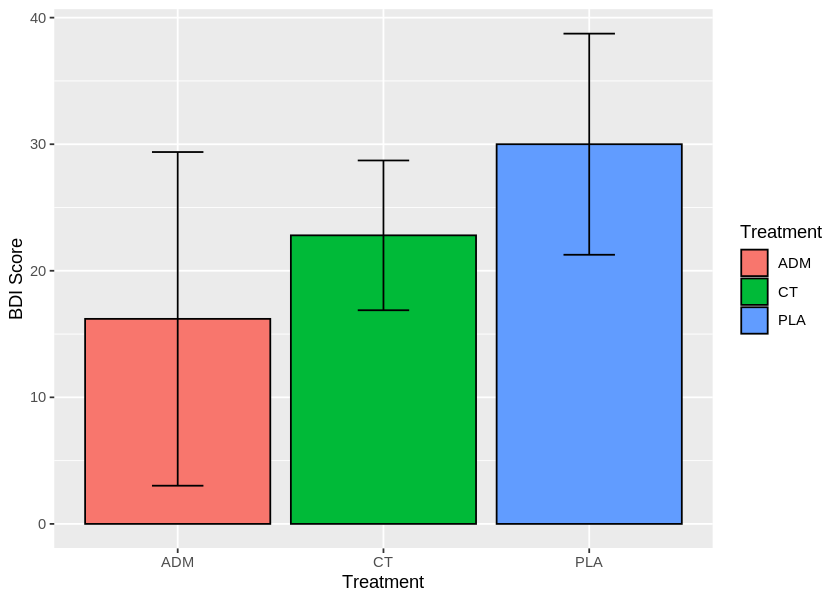

In [10]:
ggplot(plotData, aes(x = Treatment, y = Mean)) +
  geom_bar(stat = "identity", colour = "black",
            aes(fill = Treatment)) +
  geom_errorbar(aes(ymin = CI_bottom,
                    ymax = CI_top),
                width = 0.25) +
  ylab("BDI Score")

# ANOVA as Linear Regression

In [11]:
# Dummy Variables; a.k.a. Planned Comparisons; a.k.a. Planned Contrasts
clinTrial$TreatADM <- ifelse(clinTrial$Treatment == "ADM", 1, 0)
clinTrial$TreatCT <- ifelse(clinTrial$Treatment == "CT", 1, 0)
clinTrial

Subject,Treatment,BDIscore,TreatADM,TreatCT
<int>,<chr>,<int>,<dbl>,<dbl>
1,PLA,36,0,0
2,PLA,36,0,0
3,PLA,28,0,0
4,PLA,31,0,0
5,PLA,19,0,0
6,ADM,4,1,0
7,ADM,7,1,0
8,ADM,17,1,0
9,ADM,25,1,0


In [12]:
ANOVAreg <- lm(BDIscore ~ TreatADM + TreatCT, data = clinTrial)
summary(ANOVAreg)


Call:
lm(formula = BDIscore ~ TreatADM + TreatCT, data = clinTrial)

Residuals:
   Min     1Q Median     3Q    Max 
 -12.2   -4.3    0.8    6.0   11.8 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)   30.000      3.511   8.545  1.9e-06 ***
TreatADM     -13.800      4.965  -2.779   0.0167 *  
TreatCT       -7.200      4.965  -1.450   0.1727    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 7.851 on 12 degrees of freedom
Multiple R-squared:  0.3918,	Adjusted R-squared:  0.2904 
F-statistic: 3.865 on 2 and 12 DF,  p-value: 0.05063


# "Classic" Omnibus ANOVA F-Test Output

In [13]:
# Factor Treatment Column
clinTrial$Treatment <- factor(clinTrial$Treatment)

In [16]:
ANOVAclassic <- aov(BDIscore ~ Treatment, data = clinTrial)

In [17]:
summary(ANOVAclassic)

            Df Sum Sq Mean Sq F value Pr(>F)  
Treatment    2  476.4  238.20   3.865 0.0506 .
Residuals   12  739.6   61.63                 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

In [18]:
clinTrial

Subject,Treatment,BDIscore,TreatADM,TreatCT
<int>,<fct>,<int>,<dbl>,<dbl>
1,PLA,36,0,0
2,PLA,36,0,0
3,PLA,28,0,0
4,PLA,31,0,0
5,PLA,19,0,0
6,ADM,4,1,0
7,ADM,7,1,0
8,ADM,17,1,0
9,ADM,25,1,0
